In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler

In [2]:
full_op = pd.read_csv('full_data.csv')

In [3]:
full_op.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
full_op.head(10)

,Age,Cabin,Parch,Pclass,SibSp,Survived,C,Q,S,Cabin_letter,title,sex,Fare_bin_id,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category2,Fare
0,22.000000,U0,0,3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,5,7.2500
1,38.000000,C85,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,71.2833
2,26.000000,U0,0,3,0,1,0,0,1,0,2,0,2,0,0,1,0,0,5,7.9250
3,35.000000,C123,0,1,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,53.1000
4,35.000000,U0,0,3,0,0,0,0,1,0,0,1,2,0,0,1,0,0,5,8.0500
5,30.956315,U0,0,3,0,0,0,1,0,0,0,1,2,0,0,1,0,0,5,8.4583
6,54.000000,E46,0,1,0,0,0,0,1,2,0,1,1,0,1,0,0,0,1,51.8625
7,2.000000,U0,1,3,3,0,0,0,1,0,3,1,3,0,0,0,1,0,4,21.0750
8,27.000000,U0,2,3,0,1,0,0,1,0,1,0,3,0,0,0,1,0,5,11.1333
9,14.000000,U0,0,2,1,1,1,0,0,0,1,0,4,0,0,0,0,1,2,30.0708


In [5]:
scale_fare_age = StandardScaler().fit(full_op[['Age', 'Fare']])

In [6]:
full_op[['Age', 'Fare']] = scale_fare_age.transform(full_op[['Age', 'Fare']])

In [7]:
full_op.head(8)

,Age,Cabin,Parch,Pclass,SibSp,Survived,C,Q,S,Cabin_letter,title,sex,Fare_bin_id,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category2,Fare
0,-0.569648,U0,0,3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,5,-0.503402
1,0.621286,C85,0,1,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0.734222
2,-0.271915,U0,0,3,0,1,0,0,1,0,2,0,2,0,0,1,0,0,5,-0.490356
3,0.397986,C123,0,1,1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0.382778
4,0.397986,U0,0,3,0,0,0,0,1,0,0,1,2,0,0,1,0,0,5,-0.487940
5,0.097001,U0,0,3,0,0,0,1,0,0,0,1,2,0,0,1,0,0,5,-0.480049
6,1.812220,E46,0,1,0,0,0,0,1,2,0,1,1,0,1,0,0,0,1,0.358860
7,-2.058315,U0,1,3,3,0,0,0,1,0,3,1,3,0,0,0,1,0,4,-0.236195


In [8]:
op_backup = full_op

In [9]:
full_op.drop(['Cabin'], axis = 1, inplace=True)

In [10]:
len(full_op)

1309

In [11]:
train_set = full_op[:891]
test_set = full_op[891:]

In [12]:
len(test_set.columns)

19

In [13]:
X_train = train_set.drop('Survived', axis = 1)
y_train = train_set['Survived']
X_test = test_set.drop('Survived', axis=1)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
RF_para_grid = {'n_estimators' : [200, 250, 300, 350, 400], 
                'criterion': ['entropy'],
                'max_depth' : [6, 8, 9, 10],
                'max_features': ['auto',5,6,7,8]}

In [52]:
RFC = RandomForestClassifier()

In [53]:
RF_Grid = GridSearchCV(RFC, RF_para_grid, cv=5, n_jobs=5, verbose=1, scoring = 'accuracy')

In [54]:
RF_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   22.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   57.0s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'n_estimators': [200, 250, 300, 350, 400], 'criterion': ['entropy'], 'max_depth': [6, 8, 9, 10], 'max_features': ['auto', 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [55]:
print('RF Best Parameters: ' + str(RF_Grid.best_params_))

RF Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 7, 'n_estimators': 300}


In [56]:
print('RF Best Score: '+ str(RF_Grid.best_score_))

RF Best Score: 0.8372615039281706


In [57]:
RF_Model_Result = pd.DataFrame(RF_Grid.cv_results_)

C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\util

In [58]:
RF_Model_Result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)

In [59]:
RF_Model_Result = RF_Model_Result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]

In [60]:
RF_Model_Result.to_csv('RF_MODEL_RESULT.csv')

In [29]:
from sklearn.externals import joblib

In [62]:
joblib.dump(RF_Grid.best_estimator_, 'RF_BEST_MODEL.pkl')

['RF_BEST_MODEL.pkl']

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
Ada_para_grid = {'base_estimator': [DecisionTreeClassifier(max_depth = 3), DecisionTreeClassifier(max_depth = 5), DecisionTreeClassifier(max_depth=6)],
                 'n_estimators' : [100, 150, 200],
                 'learning_rate': [0.01, 0.1, 1, 5]}

In [22]:
ada = AdaBoostClassifier(random_state = 0)
Ada_grid = GridSearchCV(ada, Ada_para_grid, cv = 5, n_jobs = 5, scoring = 'accuracy')

In [23]:
Ada_grid.fit(X_train, y_train)

C:\Users\naive\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_frac...
            splitter='best')], 'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.1, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
Ada_result = pd.DataFrame(Ada_grid.cv_results_)

C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\util

In [26]:
Ada_result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)

In [27]:
Ada_result = Ada_result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]

In [28]:
Ada_result.to_csv('Ada_result.csv')

In [30]:
joblib.dump(Ada_grid.best_estimator_, 'ADA_BEST_MODEL.pkl')

['ADA_BEST_MODEL.pkl']

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
GBC_Grid_param = [{'learning_rate' : [0.01, 0.1, 1],
                  'n_estimators' : [150, 200, 300, 350],
                  'max_depth': [5, 6, 7],
                  'max_features': ['auto', 6,7,9]},
                 {'learning_rate' : [0.01, 0.1, 1],
                  'n_estimators' : [150, 200, 300, 350],
                  'max_depth': [5, 6, 7],
                  'max_features': ['auto', 6,7,9]}
                 ]

In [51]:
gbc = GradientBoostingClassifier(random_state = 0 )
GBC_grid = GridSearchCV(gbc, GBC_Grid_param, cv = 5, n_jobs = 5, scoring = 'accuracy')
GBC_grid.fit(X_train, y_train)
GBC_result = pd.DataFrame(GBC_grid.cv_results_)
GBC_result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)
GBC_result = GBC_result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]
GBC_result.to_csv('GBC_Model_result.csv')

C:\Users\naive\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation

In [52]:
joblib.dump(GBC_grid.best_estimator_, 'GBC_MODEL.pkl')

['GBC_MODEL.pkl']

In [133]:
from xgboost import XGBClassifier
import xgboost as xgb

In [134]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)

C:\Users\naive\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\naive\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [59]:
XGB_para_grid = {
              'objective':['binary:logistic'],
              'learning_rate': [0.01, 0.05,0,1], #so called `eta` value
              'max_depth': [5,6,7],
              'min_child_weight': [9,11,12],
              'colsample_bytree': [0.7],
              'n_estimators': [150, 200, 300, 350] #number of trees, change it to 1000 for better results
              }

In [60]:
xgb_classifier = xgb.XGBClassifier(random_state = 0)

In [61]:
xgb_grid = GridSearchCV(xgb_classifier, XGB_para_grid, cv = 5, n_jobs = 5, scoring = 'accuracy' )

In [62]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'objective': ['binary:logistic'], 'learning_rate': [0.01, 0.05, 0, 1], 'max_depth': [5, 6, 7], 'min_child_weight': [9, 11, 12], 'colsample_bytree': [0.7], 'n_estimators': [150, 200, 300, 350]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [145]:
xgb_grid.best_estimator_.predict(X_test).shape

(418,)

In [63]:
xgb_result = pd.DataFrame(xgb_grid.cv_results_)
xgb_result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)
xgb_result = xgb_result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]
xgb_result.to_csv('xgb_Model_result.csv')

C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\util

In [64]:
joblib.dump(xgb_grid.best_estimator_, 'XGB_BEST_MODEL.pkl')

['XGB_BEST_MODEL.pkl']

In [69]:
RF_Best_Model = joblib.load('RF_BEST_MODEL.pkl')

In [70]:
feature_importance = pd.DataFrame({'feature': list(X_train.columns),
                                   'RF_importance': RF_Best_Model.feature_importances_,
                                   'Ada_importance': Ada_grid.best_estimator_.feature_importances_,
                                   'GBC_importance': GBC_grid.best_estimator_.feature_importances_,
                                   'XGB_importance': xgb_grid.best_estimator_.feature_importances_})

In [71]:
feature_importance

,feature,RF_importance,Ada_importance,GBC_importance,XGB_importance
0,Age,0.160398,0.110651,0.168533,0.029800
1,Parch,0.022159,0.002563,0.021339,0.033346
2,Pclass,0.051943,0.057214,0.051769,0.183206
3,SibSp,0.040836,0.012717,0.039934,0.021223
4,C,0.010588,0.005313,0.008876,0.028385
5,Q,0.006801,0.000000,0.006494,0.000000
6,S,0.013901,0.018478,0.014937,0.066641
7,Cabin_letter,0.054492,0.071570,0.047285,0.072865
8,title,0.202274,0.366185,0.234365,0.328442
9,sex,0.167655,0.142414,0.145778,0.061604


<BarContainer object of 18 artists>

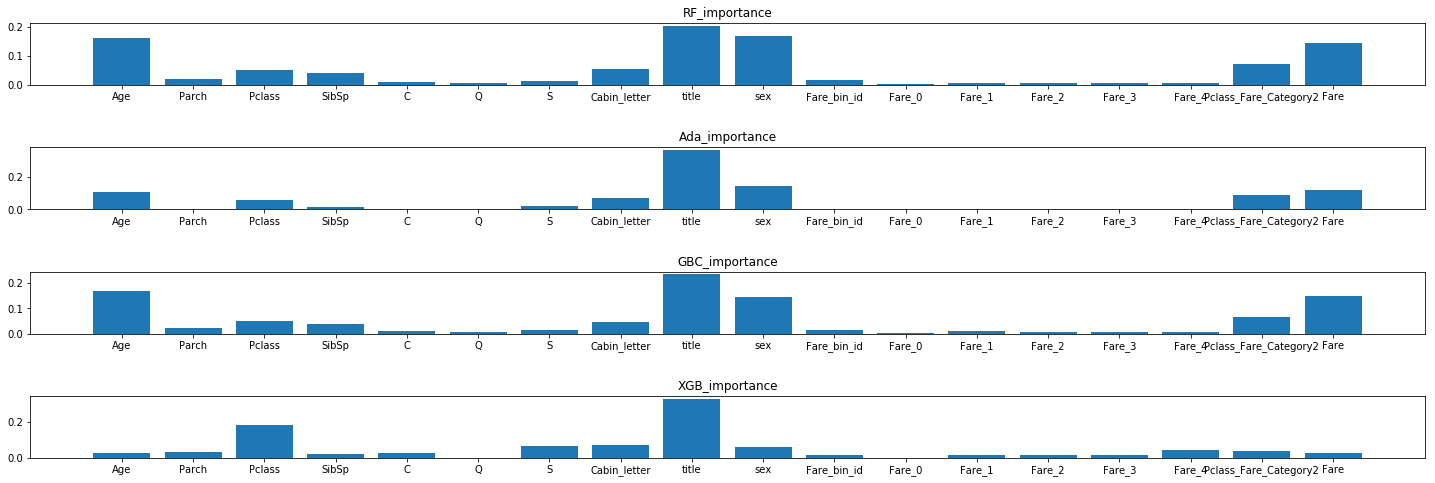

In [95]:
plt.figure(figsize=(25,8))
plt.subplots_adjust(hspace=1)
plt.subplot(411)
plt.title('RF_importance',loc='center')
plt.bar(feature_importance['feature'], feature_importance['RF_importance'])

plt.subplot(412)
plt.title('Ada_importance')
plt.bar(feature_importance['feature'], feature_importance['Ada_importance'])

plt.subplot(413)
plt.title('GBC_importance')
plt.bar(feature_importance['feature'], feature_importance['GBC_importance'])

plt.subplot(414)
plt.title('XGB_importance')
plt.bar(feature_importance['feature'], feature_importance['XGB_importance'])

In [96]:
from sklearn.model_selection import KFold

In [164]:
kf = KFold(7, random_state = 0, shuffle = False)
def get_out_fold(clf, x_train, y_train, x_test):
    num_train = x_train.shape[0]
    num_test = x_test.shape[0]
    num_folder = 7
    
    oof_train = np.zeros(num_train)
    oof_test_skf = np.zeros((num_folder, num_test))
    oof_test = np.zeros((num_test,))
    
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        x_te = x_train[test_index]
        y_tr = y_train[train_index]
        
        clf.fit(x_tr, y_tr)
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis = 0)
    return oof_train.reshape(-1,1), oof_test.reshape(-1,1)

In [121]:
ada = AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=150, random_state=0)

In [123]:
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=7,
              max_features=6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [125]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
ExtremeGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0, learning_rate=1,
       max_delta_step=0, max_depth=6, min_child_weight=11,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [156]:
X_test[X_test.isnull().values == True]

,Age,Parch,Pclass,SibSp,C,Q,S,Cabin_letter,title,sex,Fare_bin_id,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category2,Fare
1043,2.296037,0,3,0,0,0,1,0,0,1,3,0,0,0,1,0,4,NaN


In [159]:
X_test['Fare'].fillna(18.5, inplace = True)

In [165]:
gbc_oof_train, gbc_oof_test = get_out_fold(gbc, x_train = X_train.values, y_train = y_train.values, x_test = X_test.values)

In [167]:
ada_oof_train, ada_oof_test = get_out_fold(ada,x_train = X_train.values, y_train = y_train.values, x_test = X_test.values)

In [168]:
rf_oof_train, rf_oof_test = get_out_fold(rf, x_train = X_train.values, y_train = y_train.values, x_test = X_test.values)

In [169]:
xgb_oof_train, xgb_oof_test = get_out_fold(ExtremeGB,x_train = X_train.values, y_train = y_train.values, x_test = X_test.values)

In [170]:
second_train = np.concatenate((gbc_oof_train, ada_oof_train, rf_oof_train, xgb_oof_train), axis = 1)
second_test = np.concatenate((gbc_oof_test, ada_oof_test, rf_oof_test, xgb_oof_test), axis = 1)

In [182]:
df_first_result = pd.DataFrame({'gbc': pd.Series(gbc_oof_test.reshape(-1)),
                                'ada': pd.Series(ada_oof_test.reshape(-1)),
                                'rf': pd.Series(rf_oof_test.reshape(-1)),
                                'xgb': pd.Series(xgb_oof_test.reshape(-1))})

In [194]:
df_first_result.to_csv('first_result.csv')

In [193]:
df_second_train = pd.DataFrame({'gbc': pd.Series(gbc_oof_train.reshape(-1)),
                                'ada': pd.Series(ada_oof_train.reshape(-1)),
                                'rf': pd.Series(rf_oof_train.reshape(-1)),
                                'xgb': pd.Series(xgb_oof_train.reshape(-1))})

In [195]:
df_second_train.to_csv('first_train_result.csv')

In [192]:
from Plot_learning_curve import plot_learning_curve